<a href="https://colab.research.google.com/github/jpscard/IA-Conexionista-UFSC/blob/main/Exerc%C3%ADcio_1_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1: Regressão Linear




### 1. Regressão Linear com Uma Variável

> uma regressão linear com uma variável para prever lucros para um food truck. Suponha que você é o CEO de uma franquia de restaurantes e está considerando diferentes cidades para abrir um novo ponto de venda. A rede já possui caminhões em várias cidades e você tem dados de lucros e populações dessas cidades. Você gostaria de usar esses dados para ajudar a selecionar em qual cidade expandir a seguir.

 > O arquivo ex1data1.txt contém o conjunto de dados para nosso problema de regressão linear. A primeira coluna é a população de uma cidade e a segunda coluna é o lucro de um food truck nessa cidade. Um valor negativo para lucro indica uma perda.

### 1.1 Importando bibliotecas

In [1]:
# Importa a biblioteca NumPy, utilizada para operações matemáticas e manipulação de arrays
import numpy as np
# Importa a biblioteca Pandas, utilizada para manipulação e análise de dados tabulares
import pandas as pd
# Importa a biblioteca Seaborn, especializada em visualização de dados estatísticos
import seaborn as sns
# Importa a biblioteca Matplotlib.pyplot, utilizada para criação de gráficos e visualizações
import matplotlib.pyplot as plt
# Configura o ambiente do Jupyter Notebook para exibir os gráficos inline (dentro do próprio notebook)
%matplotlib inline

### 1.2 Visualizando os Dados

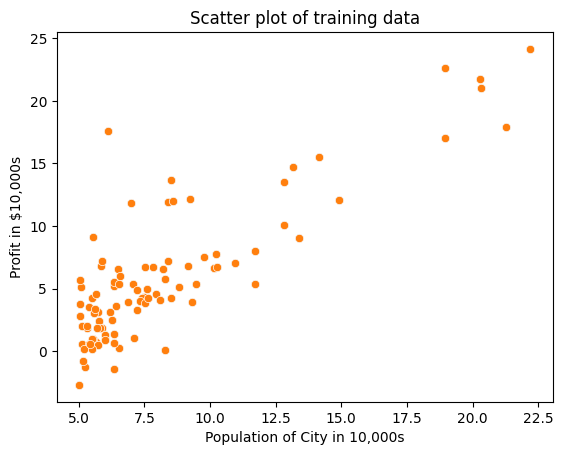

In [2]:
# Leitura do arquivo CSV 'ex1data1.txt', com campos separados por vírgulas e sem linha de cabeçalho
df = pd.read_csv('/content/ex1data1.txt', sep=',', header=None)

# Renomeia as colunas do DataFrame para 'population' e 'profit' para facilitar a identificação e manipulação dos dados
df.columns = ['population', 'profit']

# Cria um gráfico de dispersão utilizando Seaborn, com 'population' no eixo x e 'profit' no eixo y
ax = sns.scatterplot(x='population', y='profit', data=df)

# Configura os rótulos dos eixos e o título do gráfico
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Scatter plot of training data');
ax = sns.scatterplot(x='population', y='profit', data=df)

O gráfico mostra que eles têm uma relação linear.

### 1.3 Gradiente Descente

Ajuste os parâmetros de regressão linear $\theta$ ao conjunto de dados usando gradiente descendente

#### 1.2.1 Atualizar equações
A hipótese de regressão linear é:
 $$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

 O objetivo da regressão linear é minimizar a função de custo (Root Mean Square Error RMSE):
 $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

 Para minimizar o custo de $J(\theta)$ usaremos o algoritmo de descida gradiente em lote.

 Na descida gradiente em lote, cada iteração realiza a atualização


$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$

(atualizar simultaneamente $\theta_j$ para todos $j$). A cada passo da descida do gradiente, seus parâmetros $\theta_j$ se aproximam dos valores ideais que atingirão o menor custo $J(\theta)$.

### 1.3.2 Implementação

A necessidade de adicionar outra dimensão aos nossos dados para acomodar o termo de interceptação $\theta_0$. Isso nos permite tratar $\theta_0$ simplesmente como outro recurso.

In [3]:
# Obtém o número de exemplos (linhas) no DataFrame
m = df.shape[0]

# Cria a matriz de características X, adicionando uma coluna de 1s para o termo de intercepção
X = np.hstack((np.ones((m,1)), df.population.values.reshape(-1,1)))

# Cria o vetor de saída y a partir da coluna 'profit', garantindo que tenha a forma correta (m,1)
y = np.array(df.profit.values).reshape(-1,1)

# Inicializa o vetor de parâmetros theta com zeros, com o mesmo número de linhas que X tem colunas
theta = np.zeros(shape=(X.shape[1],1))

# Define o número de iterações para o algoritmo de gradiente descendente
iterations = 1500

# Define a taxa de aprendizado para o algoritmo de gradiente descendente
alpha = 0.01

#### 1.3.3 Calculando o custo $J(\theta)$

In [4]:
def compute_cost_one_variable(X, y, theta):
    # Obtém o número de exemplos (linhas) no vetor de saída y
    m = y.shape[0]

    # Calcula as previsões do modelo (hipótese) multiplicando a matriz de características X pelo vetor de parâmetros theta
    h = X.dot(theta)

    # Calcula a função de custo J utilizando a fórmula do erro quadrático médio
    J = (1/(2*m)) * (np.sum((h - y)**2))

    # Retorna o valor da função de custo
    return J

In [5]:
# Calcula o custo inicial com theta inicializado como [0 ; 0]
J = compute_cost_one_variable(X, y, theta)

# Imprime o valor do custo calculado com os parâmetros iniciais
print('Com theta = [0 ; 0]\nCusto calculado =', J)

# Imprime o valor esperado do custo para comparação
print('Valor esperado do custo (aproximadamente) 32.07')

Com theta = [0 ; 0]
Custo calculado = 32.072733877455676
Valor esperado do custo (aproximadamente) 32.07


In [6]:
# Calcula o custo com theta definido como [-1 ; 2]
J = compute_cost_one_variable(X, y, [[-1],[2]])

# Imprime o valor do custo calculado com os parâmetros especificados
print('Com theta = [-1 ; 2]\nCusto calculado =', J)

# Imprime o valor esperado do custo para comparação
print('Valor esperado do custo (aproximadamente) 54.24')

Com theta = [-1 ; 2]
Custo calculado = 54.24245508201238
Valor esperado do custo (aproximadamente) 54.24


#### 1.3.4 Gradiente Descendente
 O gradiente descendente é um algoritmo de otimização genérico que mede o gradiente local da função de custo em relação ao parâmetro $\theta$ e segue na direção do gradiente descendente.

Algoritmo:
repita até a convergência:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$

onde $j=0,1$; $\alpha$ é a taxa de aprendizagem (as etapas para atualizar J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ é uma derivada.


* Taxa de aprendizagem pequena: descida gradiente lenta
* Taxa de aprendizagem muito grande: a descida do gradiente pode ultrapassar o mínimo e pode não convergir


In [7]:
def gradient_descent(X, y, theta, alpha, num_iters):  # Define a função gradient_descent com parâmetros X, y, theta, alpha e num_iters
    m = y.shape[0]  # Obtém o número de exemplos de treinamento a partir da forma de y
    J_history = np.zeros(shape=(num_iters, 1))  # Inicializa um vetor para armazenar o histórico do custo (função de erro) em cada iteração

    for i in range(0, num_iters):  # Loop que executa num_iters vezes
        h = X.dot(theta)  # Calcula a hipótese (predições) multiplicando X por theta
        diff_hy = h - y  # Calcula a diferença entre a hipótese e os valores reais y

        delta = (1/m) * (diff_hy.T.dot(X))  # Calcula a derivada parcial da função de custo em relação a theta
        theta = theta - (alpha * delta.T)  # Atualiza os valores de theta usando a taxa de aprendizagem alpha
        J_history[i] = compute_cost_one_variable(X, y, theta)  # Calcula e armazena o custo atual na i-ésima posição de J_history

    return theta, J_history  # Retorna os valores otimizados de theta e o histórico do custo

In [8]:
# Executa o algoritmo de gradiente descendente para encontrar os valores ótimos de theta
theta, _ = gradient_descent(X, y, theta, alpha, iterations)  # Chama a função gradient_descent com os parâmetros fornecidos e armazena o resultado em `theta`

# Imprime os valores de theta encontrados pelo gradiente descendente
print('Teta encontrado por gradiente descendente:\n', theta)  # Exibe os valores de theta encontrados pelo algoritmo

# Imprime os valores esperados de theta para fins de comparação
print('Valores teta esperados (aproximadamente)\n -3,6303\n 1,1664')  # Exibe os valores esperados de theta para verificação

Teta encontrado por gradiente descendente:
 [[-3.63029144]
 [ 1.16636235]]
Valores teta esperados (aproximadamente)
 -3,6303
 1,1664


#### Trace o ajuste linear:

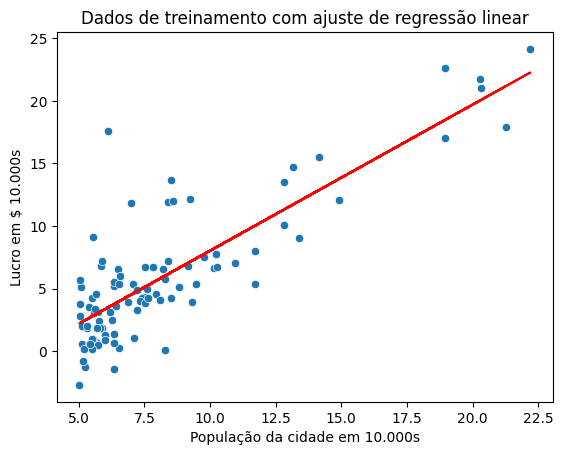

In [9]:
# Cria um gráfico de dispersão dos dados de treinamento
ax = sns.scatterplot(x='population', y='profit', data=df)  # Plota um scatter plot usando seaborn, com 'population' no eixo x e 'profit' no eixo y a partir do dataframe df

# Plota a linha de regressão linear ajustada
plt.plot(X[:,1], X.dot(theta), color='r')  # Adiciona uma linha de regressão linear ao gráfico, calculada a partir de X e theta, com a linha na cor vermelha

# Define os rótulos dos eixos e o título do gráfico
ax.set(xlabel='População da cidade em 10.000s',  # Define o rótulo do eixo x
       ylabel='Lucro em $ 10.000s',             # Define o rótulo do eixo y
       title='Dados de treinamento com ajuste de regressão linear')  # Define o título do gráfico

# Exibe o gráfico
plt.show()  # Mostra o gráfico gerado

In [10]:
# Calcula a predição de lucro para uma população de 35,000
y_pred = np.array([1, 3.5]).dot(theta)  # Cria um vetor [1, 3.5] onde 1 é o termo de bias e 3.5 representa a população em unidades de 10,000, e calcula a predição multiplicando pelo vetor theta

# Imprime a predição de lucro para a população de 35,000
print(f'Para população = 35.000, prevemos um lucro de {y_pred*10000}')  # Usa uma f-string para formatar e imprimir a predição de lucro, multiplicando por 10,000 para converter a unidade

Para população = 35.000, prevemos um lucro de [4519.7678677]


In [11]:
# Calcula a predição de lucro para uma população de 70,000
y_pred = np.array([1, 7]).dot(theta)  # Cria um vetor [1, 7] onde 1 é o termo de bias e 7 representa a população em unidades de 10,000, e calcula a predição multiplicando pelo vetor theta

# Imprime a predição de lucro para a população de 70,000
f'Para população = 70.000, prevemos um lucro de {y_pred*10000}'  # Usa uma f-string para formatar e imprimir a predição de lucro, multiplicando por 10,000 para converter a unidade


'Para população = 70.000, prevemos um lucro de [45342.45012945]'

### 1.4 Visualizando $J(\theta)$

A função de custo $J(\theta)$ tem formato de tigela e possui um mínimo global. Este mínimo é o ponto ideal para $\theta_0$ e $\theta_1$, e cada passo da descida do gradiente se aproxima deste ponto.

In [12]:
# Gera 100 valores linearmente espaçados para theta0 no intervalo de -10 a 10
theta0_vals = np.linspace(-10, 10, 100)  # Cria um vetor de 100 valores igualmente espaçados entre -10 e 10 para theta0

# Gera 100 valores linearmente espaçados para theta1 no intervalo de -1 a 4
theta1_vals = np.linspace(-1, 4, 100)  # Cria um vetor de 100 valores igualmente espaçados entre -1 e 4 para theta1

In [13]:
# Inicializa uma matriz de zeros para armazenar os valores da função de custo
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))  # Cria uma matriz de zeros com dimensões iguais ao número de valores em theta0_vals e theta1_vals

In [14]:
# Calcula os valores da função de custo para cada combinação de theta0 e theta1
for i in range(0, len(theta0_vals)):  # Loop sobre todos os valores de theta0
    for j in range(0, len(theta1_vals)):  # Loop sobre todos os valores de theta1
        # Calcula a função de custo para a combinação atual de theta0 e theta1 e armazena em J_vals
        J_vals[i, j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

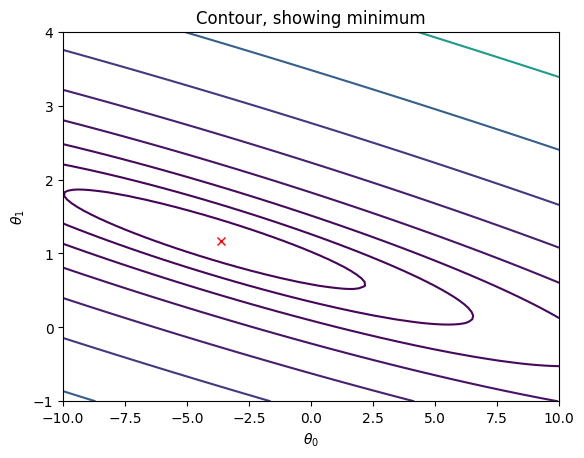

In [15]:
# Cria um gráfico de contorno da função de custo
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2, 3, 20))
# Plota os contornos de J_vals em relação a theta0_vals e theta1_vals
# np.transpose(J_vals) é usado para alinhar corretamente os dados
# levels=np.logspace(-2, 3, 20) define 20 níveis de contorno em uma escala logarítmica de 10^-2 a 10^3

# Plota o ponto ótimo de theta no gráfico de contorno
plt.plot(theta[0, 0], theta[1, 0], marker='x', color='r')
# Plota um 'x' vermelho no ponto (theta[0, 0], theta[1, 0]), que representa os valores de theta encontrados pelo gradiente descendente

# Define os rótulos dos eixos e o título do gráfico
plt.xlabel(r'$\theta_0$')  # Define o rótulo do eixo x como θ_0
plt.ylabel(r'$\theta_1$')  # Define o rótulo do eixo y como θ_1
plt.title('Contour, showing minimum')  # Define o título do gráfico

# Exibe o gráfico
plt.show()  # Mostra o gráfico gerado

## 2. Regressão Linear com Múltiplas Variáveis

> regressão linear com múltiplas variáveis para prever os preços das casas. Suponha que você está vendendo sua casa e deseja saber qual seria um bom preço de mercado. Uma maneira de fazer isso é primeiro coletar informações sobre casas vendidas recentemente e criar um modelo dos preços das casas. O arquivo ex1data2.txt contém um conjunto de treinamento de preços de casas em Portland, Oregon. A primeira coluna é o tamanho da casa (em pés quadrados), a segunda coluna é o número de quartos e a terceira coluna é o preço da casa.



### 2.1 Normalização de features

In [16]:
# Carrega os dados do arquivo 'ex1data2.txt' em um DataFrame
df2 = pd.read_csv('/content/ex1data2.txt', sep=',', header=None)  # Lê o arquivo CSV, separando as colunas por vírgula e sem cabeçalho

# Define os nomes das colunas no DataFrame
df2.columns = ['house_size', 'bedrooms', 'house_price']  # Nomeia as colunas como 'house_size' (tamanho da casa), 'bedrooms' (quartos) e 'house_price' (preço da casa)

# Exibe estatísticas descritivas do DataFrame transpostas
df2.describe().T  # Calcula e exibe as estatísticas descritivas (como média, desvio padrão, mínimos e máximos) para cada coluna, transpostas para melhor legibilidade

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


> Observando os valores, observe que o tamanho das casas é cerca de 1.000 vezes o número de quartos. Quando os recursos diferem em ordens de magnitude, executar primeiro o escalonamento dos recursos pode fazer com que a descida do gradiente convirja muito mais rapidamente.


Podemos acelerar a descida do gradiente tendo cada um dos nossos valores de entrada aproximadamente no mesmo intervalo, idealmente $-1 \leq x_i \leq1$ ou $-0.5 \leq x_i \leq0.5$.

 * Escala de recursos: envolve a divisão dos valores de entrada pelo intervalo (ou seja, o valor máximo menos o valor mínimo) da variável de entrada * Normalização média: envolve subtrair o valor médio de uma variável de entrada dos valores dessa variável de entrada

$x_i := \frac{x_i - \mu_i}{s_i}$, onde $\mu_i$ é a média de todos os valores dos recursos (i) e $s_i$ é o intervalo de valores (max-min), o desvio padrão.


In [17]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):  # Define a função para normalizar os recursos
    X = np.array(X)  # Converte X para um array numpy
    if len(mean.shape) == 1 or len(std.shape) == 1:  # Verifica se mean ou std são arrays unidimensionais
        mean = np.mean(X, axis=0)  # Calcula a média de cada coluna de X
        std = np.std(X, axis=0, ddof=1)  # Calcula o desvio padrão de cada coluna de X com grau de liberdade 1

    X = (X - mean) / std  # Normaliza X subtraindo a média e dividindo pelo desvio padrão
    return X, mean, std  # Retorna o X normalizado, a média e o desvio padrão

In [18]:
# Normaliza os recursos (tamanho da casa e número de quartos) do DataFrame df2
X_norm, mu, sigma = feature_normalize(df2[['house_size', 'bedrooms']])
# Chama a função feature_normalize passando as colunas 'house_size' e 'bedrooms' do DataFrame df2
# Retorna os dados normalizados (X_norm), a média (mu) e o desvio padrão (sigma)

In [19]:
# Adiciona as colunas normalizadas ao DataFrame df2
df2['house_size_normalized'] = X_norm[:,0]  # Adiciona a coluna 'house_size_normalized' com os valores normalizados do tamanho da casa
df2['bedrooms_normalized'] = X_norm[:,1]  # Adiciona a coluna 'bedrooms_normalized' com os valores normalizados do número de quartos

# Exibe estatísticas descritivas das colunas normalizadas, transpostas
df2[['house_size_normalized', 'bedrooms_normalized']].describe().T
# Calcula e exibe as estatísticas descritivas (média, desvio padrão, mínimos, máximos, etc.) para as colunas normalizadas, transpostas para melhor legibilidade

,count,mean,std,min,25%,50%,75%,max
house_size_normalized,47.0,3.779483e-17,1.0,-1.445423,-0.715590,-0.141790,0.337635,3.117292
bedrooms_normalized,47.0,2.746030e-16,1.0,-2.851859,-0.223675,-0.223675,1.090417,2.404508


### 2.2 Gradiente Descendente

A única diferença do problema de regressão univariada é que agora há mais um recurso na matriz X. A função de hipótese e a regra de atualização da descida do gradiente em lote permanecem inalteradas.

No caso multivariado, a função custo também pode ser escrita na seguinte forma vetorizada:


$$J(\theta) = \frac{1}{2m}(X\theta-y)^T(X\theta-y)$$

In [20]:
def compute_cost(X, y, theta):  # Define a função para calcular o custo da regressão linear
    m = y.shape[0]  # Obtém o número de exemplos de treinamento a partir da forma de y
    h = X.dot(theta)  # Calcula a hipótese (predições) multiplicando X por theta
    J = (1/(2*m)) * ((h-y).T.dot(h-y))  # Calcula a função de custo usando a soma dos erros quadrados
    return J  # Retorna o valor do custo

In [21]:
def gradient_descent(X, y, theta, alpha, num_iters):  # Define a função para realizar o gradiente descendente
    m = y.shape[0]  # Obtém o número de exemplos de treinamento a partir da forma de y
    J_history = np.zeros(shape=(num_iters, 1))  # Inicializa um vetor para armazenar o histórico do custo (função de erro) em cada iteração

    for i in range(0, num_iters):  # Loop que executa num_iters vezes
        h = X.dot(theta)  # Calcula a hipótese (predições) multiplicando X por theta
        diff_hy = h - y  # Calcula a diferença entre a hipótese e os valores reais y

        delta = (1/m) * (diff_hy.T.dot(X))  # Calcula a derivada parcial da função de custo em relação a theta
        theta = theta - (alpha * delta.T)  # Atualiza os valores de theta usando a taxa de aprendizagem alpha
        J_history[i] = compute_cost(X, y, theta)  # Calcula e armazena o custo atual na i-ésima posição de J_history

    return theta, J_history  # Retorna os valores otimizados de theta e o histórico do custo


#### 2.2.1 Selecionando Taxas de Aprendizagem


 * Faça um gráfico com o número de iterações no eixo x. Agora trace a função de custo, $J(\theta)$ sobre o número de iterações da descida do gradiente. Se $J(\theta)$ aumentar, provavelmente você precisará diminuir $\alpha$.

 * Declare convergência se $J(\theta)$ diminuir menos que E em uma iteração, onde E é algum valor pequeno como $10^{−3}$.


In [22]:
# Obtém o número de exemplos de treinamento
m = df2.shape[0]  # df2.shape[0] retorna o número de linhas no DataFrame, ou seja, o número de exemplos

# Adiciona uma coluna de 1s à matriz X_norm para o termo de intercepto
X = np.hstack((np.ones((m, 1)), X_norm))  # np.hstack empilha horizontalmente uma coluna de 1s (termo de bias) com a matriz X_norm

# Converte a coluna de preços das casas em um array numpy e a transforma em uma matriz coluna
y = np.array(df2.house_price.values).reshape(-1, 1)  # Converte a coluna 'house_price' do DataFrame em um array numpy e a remodela para ser uma matriz coluna

# Inicializa o vetor de parâmetros theta com zeros
theta = np.zeros(shape=(X.shape[1], 1))  # Cria uma matriz de zeros com o mesmo número de linhas que o número de características (incluindo o termo de bias)

In [23]:
# Define uma lista de taxas de aprendizagem para o gradiente descendente
alpha = [0.3, 0.1, 0.03, 0.01]  # Taxas de aprendizagem diferentes para comparar a convergência do gradiente descendente

# Define uma lista de cores para plotar diferentes curvas de custo
colors = ['b', 'r', 'g', 'c']  # Cores usadas para plotar as diferentes curvas de custo para cada taxa de aprendizagem

# Define o número de iterações para o gradiente descendente
num_iters = 50  # Número de iterações para executar o algoritmo de gradiente descendente

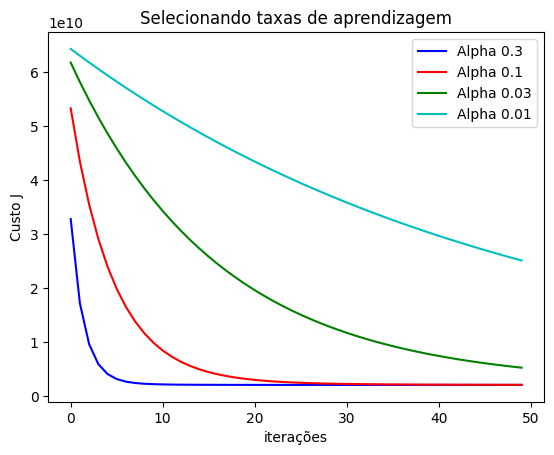

In [24]:
# Loop para executar o gradiente descendente com diferentes taxas de aprendizagem
for i in range(0, len(alpha)):  # Itera sobre cada valor de alpha
    theta = np.zeros(shape=(X.shape[1], 1))  # Inicializa theta com zeros para cada valor de alpha
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)  # Executa o gradiente descendente com a taxa de aprendizagem atual
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))  # Plota a curva de custo para a taxa de aprendizagem atual

# Configurações do gráfico
plt.xlabel('iterações')  # Define o rótulo do eixo x como "Number of iterations" (Número de iterações)
plt.ylabel('Custo J')  # Define o rótulo do eixo y como "Cost J" (Custo J)
plt.title('Selecionando taxas de aprendizagem')  # Define o título do gráfico como "Selecting learning rates" (Selecionando taxas de aprendizagem)
plt.legend()  # Adiciona uma legenda ao gráfico
plt.show()  # Exibe o gráfico

In [25]:
# Define o número de iterações para o gradiente descendente
iterations = 250  # Número de iterações a serem executadas pelo algoritmo de gradiente descendente

# Define a taxa de aprendizagem para o gradiente descendente
alpha = 0.1  # Taxa de aprendizagem para o algoritmo de gradiente descendente

# Executa o gradiente descendente para encontrar os parâmetros theta ótimos
theta, _ = gradient_descent(X, y, theta, alpha, iterations)  # Chama a função gradient_descent com os parâmetros definidos

# Imprime os valores de theta encontrados pelo gradiente descendente
print('Theta encontrado por gradiente descendente:')  # Mensagem indicando que os valores de theta serão exibidos
print(theta)  # Exibe os valores de theta encontrados

Theta encontrado por gradiente descendente:
[[340412.65957372]
 [110630.26530813]
 [ -6648.6893001 ]]


##### Estimando o preço de uma casa com 1.650 m² e 3 quartos:

In [26]:
# Normaliza as características da casa com 1650 square feet e 3 quartos usando a média e o desvio padrão calculados anteriormente
sqft = (1650 - mu[0]) / sigma[0]  # Normaliza o tamanho da casa subtraindo a média e dividindo pelo desvio padrão
bedrooms = (3 - mu[1]) / sigma[1]  # Normaliza o número de quartos subtraindo a média e dividindo pelo desvio padrão

# Calcula a predição do preço da casa usando os parâmetros theta encontrados pelo gradiente descendente
y_pred = theta[0] + theta[1]*sqft + theta[2]*bedrooms  # Calcula a predição combinando os parâmetros theta com as características normalizadas

# Formata a predição do preço da casa para exibição
f'Preço de uma casa com 1.650 m² e 3 quartos: {y_pred[0]:.2f} $'  # Exibe o preço previsto da casa formatado com duas casas decimais

'Preço de uma casa com 1.650 m² e 3 quartos: 293081.64 $'

### 2.3 Equações Normais

Uma solução de formato fechado para encontrar $\theta$ sem iteração.

$$\theta = (X^TX)^{-1}X^Ty$$

In [27]:
def normal_eqn(X, y):  # Define a função para calcular os parâmetros theta usando a equação normal
    inv = np.linalg.pinv(X.T.dot(X))  # Calcula a pseudoinversa de X^T * X usando a função pinv do numpy
    theta = inv.dot(X.T).dot(y)  # Calcula theta multiplicando a pseudoinversa pelo produto de X^T e y
    return theta  # Retorna os valores de theta

In [28]:
# Adiciona uma coluna de 1s à matriz de características para o termo de intercepto
Xe = np.hstack((np.ones((m, 1)), df2[['house_size', 'bedrooms']].values))  # Empilha horizontalmente uma coluna de 1s (termo de bias) com as colunas 'house_size' e 'bedrooms' do DataFrame df2

# Calcula os parâmetros theta usando a equação normal
theta_e = normal_eqn(Xe, y)  # Chama a função normal_eqn passando a matriz de características Xe e o vetor de saída y

# Exibe os valores de theta calculados pela equação normal
theta_e  # Retorna os valores de theta

array([[89597.90954355],
       [  139.21067402],
       [-8738.01911255]])

In [29]:
# Calcula a predição do preço da casa usando os parâmetros theta calculados pela equação normal
y_pred = theta_e[0] + theta_e[1]*1650 + theta_e[2]*3  # Calcula a predição combinando os parâmetros theta_e com as características da casa (1650 square feet e 3 quartos)

# Formata a predição do preço da casa para exibição
f'Preço de uma casa com 1.650 m2 e 3 quartos: {y_pred[0]:.2f} $'  # Exibe o preço previsto da casa formatado com duas casas decimais

'Preço de uma casa com 1.650 m2 e 3 quartos: 293081.46 $'